In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-data-for-reg/fake_reg.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
df = pd.read_csv('../input/fake-data-for-reg/fake_reg.csv')

In [4]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


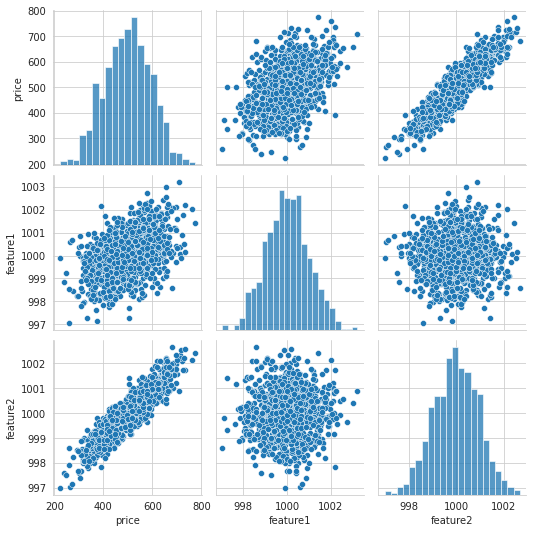

In [5]:
sns.pairplot(df)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df[['feature1', 'feature2']].values

In [8]:
y = df['price'].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [10]:
X_train.shape

(700, 2)

In [11]:
y_train.shape

(700,)

In [12]:
X_test.shape

(300, 2)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
scaler.fit(X_train)

MinMaxScaler()

In [16]:
X_train = scaler.transform(X_train)

In [17]:
X_test = scaler.transform(X_test)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [19]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')


2022-07-15 21:19:34.384983: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [20]:
model.fit(x= X_train, y= y_train , epochs=250)

2022-07-15 21:19:34.549147: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/250
22/22 [==============================] - 1s 4ms/step - loss: 256598.4219
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 256508.9375
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 256410.4219
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 256295.6875
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 256163.4219
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 256011.6562
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 255839.3438
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 255644.0625
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 255425.8438
Epoch 10/250
22/22 [==============================] - 0s 2ms/step - loss: 255181.7812
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 254909.4375
Epoch 12/250
22/22 [==============================] - 0s 3ms/st

In [21]:
loss_df = pd.DataFrame(model.history.history)

<AxesSubplot:>

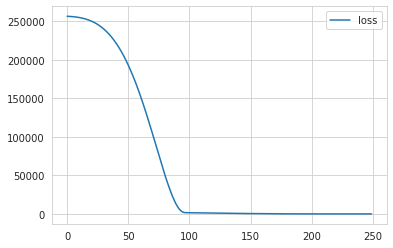

In [22]:
loss_df.plot()

In [23]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 25.1019


25.101917266845703

In [24]:
model.evaluate(X_train, y_train)

22/22 [==============================] - 0s 1ms/step - loss: 24.4051


24.405086517333984

In [25]:
predict = model.predict(X_test)

In [26]:
predict = pd.Series(predict.reshape(300,))

In [27]:
pred_df = pd.DataFrame(y_test, columns=['Test true y'])

In [28]:
test_predictions = model.predict(X_test)

In [29]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [30]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [31]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [32]:
pred_df.columns = ['Test True y' , 'model prediction']

In [33]:
pred_df

,Test True y,model prediction
0,402.296319,404.903107
1,624.156198,622.925598
2,582.455066,591.528564
3,578.588606,571.715698
4,371.224104,366.365936
...,...,...
295,525.704657,528.572144
296,502.909473,514.986450
297,612.727910,609.041260
298,417.569725,416.511261


<AxesSubplot:xlabel='Test True y', ylabel='model prediction'>

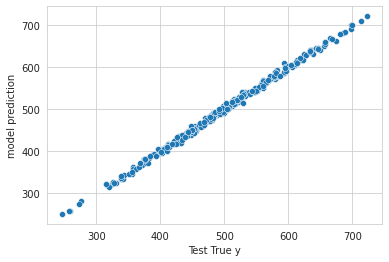

In [34]:
sns.scatterplot(x='Test True y',y='model prediction',data=pred_df)

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [36]:
mean_absolute_error(y_test, predict)

4.011530114329717

In [37]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [38]:
mean_squared_error(y_test, predict)

25.101922868106385

In [39]:
new_gem = [[998,1000]]

In [40]:
new_gem = scaler.transform(new_gem)

In [41]:
model.predict(new_gem)

array([[419.37396]], dtype=float32)